In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime 

# Pull in UI DF
ui_csv = pd.read_csv("../Resources/ui_clean.csv")

# Add Weeknum column to Data / ISO week date standard (ISO-8601) / start Mon to end Sun
ui_csv['year'] = pd.DatetimeIndex(ui_csv['Reflecting Week Ended']).year
ui_csv['month'] = pd.DatetimeIndex(ui_csv['Reflecting Week Ended']).month
ui_csv

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,year,month
0,California,2015-01-03,"40,784",2014-12-27,"420,154","15,245,478",2.76,52,2014,12
1,California,2015-01-10,"66,906",2015-01-03,"423,923","15,354,250",2.76,1,2015,1
2,California,2015-01-17,"62,191",2015-01-10,"464,163","15,354,250",3.02,2,2015,1
3,California,2015-01-24,"40,605",2015-01-17,"390,977","15,354,250",2.55,3,2015,1
4,California,2015-01-31,"58,673",2015-01-24,"468,557","15,354,250",3.05,4,2015,1
...,...,...,...,...,...,...,...,...,...,...
1753,Texas,2020-07-11,"105,516",2020-07-04,"1,313,086","12,372,188",10.61,27,2020,7
1754,Texas,2020-07-18,"87,908",2020-07-11,"1,247,269","12,372,188",10.08,28,2020,7
1755,Texas,2020-07-25,"76,804",2020-07-18,"1,338,900","12,372,188",10.82,29,2020,7
1756,Texas,2020-08-01,"62,709",2020-07-25,"1,228,250","12,372,188",9.93,30,2020,7


In [2]:
ui_base_parse = ui_csv[ui_csv["year"] != 2020]
ui_base_parse

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,year,month
0,California,2015-01-03,"40,784",2014-12-27,"420,154","15,245,478",2.76,52,2014,12
1,California,2015-01-10,"66,906",2015-01-03,"423,923","15,354,250",2.76,1,2015,1
2,California,2015-01-17,"62,191",2015-01-10,"464,163","15,354,250",3.02,2,2015,1
3,California,2015-01-24,"40,605",2015-01-17,"390,977","15,354,250",2.55,3,2015,1
4,California,2015-01-31,"58,673",2015-01-24,"468,557","15,354,250",3.05,4,2015,1
...,...,...,...,...,...,...,...,...,...,...
1722,Texas,2019-12-07,"20,649",2019-11-30,"135,760","12,168,097",1.12,48,2019,11
1723,Texas,2019-12-14,"15,037",2019-12-07,"122,185","12,168,097",1.00,49,2019,12
1724,Texas,2019-12-21,"12,589",2019-12-14,"133,899","12,168,097",1.10,50,2019,12
1725,Texas,2019-12-28,"8,947",2019-12-21,"119,380","12,168,097",0.98,51,2019,12


In [3]:
ui_base = ui_base_parse.groupby(['State', 'month'])["Insured Unemployment Rate"].mean()
ui_base = pd.DataFrame(ui_base)
ui_base['Period']="2015-2019 Avg"
ui_base

Insured Unemployment Rate         Period
State      month                                          
California 1                       2.514545  2015-2019 Avg
           2                       2.522500  2015-2019 Avg
           3                       2.479545  2015-2019 Avg
           4                       2.309091  2015-2019 Avg
           5                       2.106667  2015-2019 Avg
...                                     ...            ...
Texas      8                       1.284091  2015-2019 Avg
           9                       1.215455  2015-2019 Avg
           10                      1.163636  2015-2019 Avg
           11                      1.170476  2015-2019 Avg
           12                      1.227083  2015-2019 Avg

[72 rows x 2 columns]

In [4]:
ui_base = ui_base_parse.groupby(['State', 'month'])["Insured Unemployment Rate"].mean()
ui_base = pd.DataFrame(ui_base)
ui_base['Period']="2015-2019 Avg"
ui_base

Insured Unemployment Rate         Period
State      month                                          
California 1                       2.514545  2015-2019 Avg
           2                       2.522500  2015-2019 Avg
           3                       2.479545  2015-2019 Avg
           4                       2.309091  2015-2019 Avg
           5                       2.106667  2015-2019 Avg
...                                     ...            ...
Texas      8                       1.284091  2015-2019 Avg
           9                       1.215455  2015-2019 Avg
           10                      1.163636  2015-2019 Avg
           11                      1.170476  2015-2019 Avg
           12                      1.227083  2015-2019 Avg

[72 rows x 2 columns]

In [5]:
ui_2020_parse = ui_csv[ui_csv["year"] == 2020]
ui_2020_parse

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,year,month
262,California,2020-01-11,"51,993",2020-01-04,"356,376","17,265,039",2.06,1,2020,1
263,California,2020-01-18,"64,858",2020-01-11,"376,947","17,265,039",2.18,2,2020,1
264,California,2020-01-25,"45,596",2020-01-18,"336,269","17,265,039",1.95,3,2020,1
265,California,2020-02-01,"43,458",2020-01-25,"388,341","17,265,039",2.25,4,2020,1
266,California,2020-02-08,"40,392",2020-02-01,"359,156","17,265,039",2.08,5,2020,2
...,...,...,...,...,...,...,...,...,...,...
1753,Texas,2020-07-11,"105,516",2020-07-04,"1,313,086","12,372,188",10.61,27,2020,7
1754,Texas,2020-07-18,"87,908",2020-07-11,"1,247,269","12,372,188",10.08,28,2020,7
1755,Texas,2020-07-25,"76,804",2020-07-18,"1,338,900","12,372,188",10.82,29,2020,7
1756,Texas,2020-08-01,"62,709",2020-07-25,"1,228,250","12,372,188",9.93,30,2020,7


In [6]:
ui_2020 = ui_2020_parse.groupby(['State', 'month'])["Insured Unemployment Rate"].mean()
ui_2020 = pd.DataFrame(ui_2020)
ui_2020['Period']="2020"
ui_2020

Insured Unemployment Rate Period
State        month                                  
California   1                         2.1100   2020
             2                         2.1200   2020
             3                         3.2600   2020
             4                        15.2175   2020
             5                        16.3140   2020
             6                        16.5050   2020
             7                        16.6425   2020
             8                        17.0200   2020
Florida      1                         0.4050   2020
             2                         0.3880   2020
             3                         0.5800   2020
             4                         4.3675   2020
             5                        12.3680   2020
             6                         9.4250   2020
             7                         8.5475   2020
             8                         6.5000   2020
Georgia      1                         0.7825   2020
             2                         0.6100   2020
             3                         2.9775   2020
             4                        16.2450   2020
             5                        17.2620   2020
             6                        15.0025   2020
             7                        15.6975   2020
             8                        12.9900   2020
Maryland     1                         1.1750   2020
             2                         1.1300   2020
             3                         1.8975   2020
             4                         7.9625   2020
             5                         9.8440   2020
             6                         9.5425   2020
             7                         8.7075   2020
             8                         7.6200   2020
South Dakota 1                         0.7325   2020
             2                         0.7520   2020
             3                         0.9975   2020
             4                         4.8175   2020
             5                         5.3240   2020
             6                         4.1200   2020
             7                         3.9650   2020
             8                         3.5100   2020
Texas        1                         1.1425   2020
             2                         1.0580   2020
             3                         1.5800   2020
             4                         7.3950   2020
             5                        10.3560   2020
             6                        10.2775   2020
             7                        10.3600   2020
             8                         9.8700   2020

In [7]:
ui_base.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean')

State,California,Florida,Georgia,Maryland,South Dakota,Texas
month,,,,,,
1,2.514545,0.649545,1.009091,1.836818,0.878182,1.325000
2,2.522500,0.597000,0.823500,1.768500,0.881000,1.267500
3,2.479545,0.555455,0.725455,1.570909,0.759545,1.238636
4,2.309091,0.550909,0.707727,1.373636,0.466818,1.249545
5,2.106667,0.565714,0.722857,1.290000,0.302857,1.255714
6,2.006818,0.590455,0.733182,1.306364,0.305455,1.290909
7,2.050909,0.663182,0.788182,1.443636,0.321818,1.359545
8,2.015909,0.662727,0.719091,1.412727,0.280455,1.284091
9,1.846818,0.594091,0.680909,1.189091,0.225000,1.215455


Text(0.5, 1.0, '2015-2019 Average Monthly Unemployment % by State')

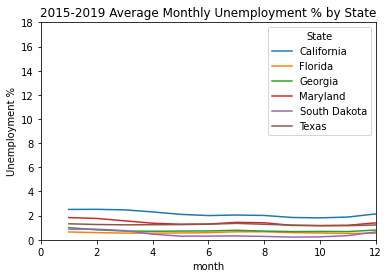

In [8]:
ui_base.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean').plot()
plt.axis([0, 12, 0, 18])
plt.ylabel('Unemployment %')
plt.title("2015-2019 Average Monthly Unemployment % by State")

In [9]:
ui_2020.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean')

State,California,Florida,Georgia,Maryland,South Dakota,Texas
month,,,,,,
1,2.1100,0.4050,0.7825,1.1750,0.7325,1.1425
2,2.1200,0.3880,0.6100,1.1300,0.7520,1.0580
3,3.2600,0.5800,2.9775,1.8975,0.9975,1.5800
4,15.2175,4.3675,16.2450,7.9625,4.8175,7.3950
5,16.3140,12.3680,17.2620,9.8440,5.3240,10.3560
6,16.5050,9.4250,15.0025,9.5425,4.1200,10.2775
7,16.6425,8.5475,15.6975,8.7075,3.9650,10.3600
8,17.0200,6.5000,12.9900,7.6200,3.5100,9.8700


Text(0.5, 1.0, '2020 Monthly Unemployment % by State')

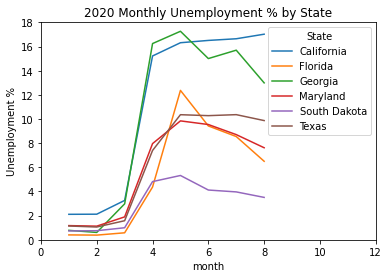

In [10]:
ui_2020.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean').plot()
plt.axis([0, 12, 0, 18])
plt.ylabel('Unemployment %')
plt.title("2020 Monthly Unemployment % by State")

In [11]:
ui_combo = ui_base.append(ui_2020)
ui_combo.to_csv("../Resources/ui_combo.csv", index=True)
ui_combo

Insured Unemployment Rate         Period
State      month                                          
California 1                       2.514545  2015-2019 Avg
           2                       2.522500  2015-2019 Avg
           3                       2.479545  2015-2019 Avg
           4                       2.309091  2015-2019 Avg
           5                       2.106667  2015-2019 Avg
...                                     ...            ...
Texas      4                       7.395000           2020
           5                      10.356000           2020
           6                      10.277500           2020
           7                      10.360000           2020
           8                       9.870000           2020

[120 rows x 2 columns]

In [12]:
ui_combo.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean')

State,California,Florida,Georgia,Maryland,South Dakota,Texas
month,,,,,,
1,2.312273,0.527273,0.895795,1.505909,0.805341,1.233750
2,2.321250,0.492500,0.716750,1.449250,0.816500,1.162750
3,2.869773,0.567727,1.851477,1.734205,0.878523,1.409318
4,8.763295,2.459205,8.476364,4.668068,2.642159,4.322273
5,9.210333,6.466857,8.992429,5.567000,2.813429,5.805857
6,9.255909,5.007727,7.867841,5.424432,2.212727,5.784205
7,9.346705,4.605341,8.242841,5.075568,2.143409,5.859773
8,9.517955,3.581364,6.854545,4.516364,1.895227,5.577045
9,1.846818,0.594091,0.680909,1.189091,0.225000,1.215455


In [20]:
# ui_combo.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean').plot()
# plt.axis([0, 12, 0, 18])
# plt.ylabel('Unemployment %')
# plt.title("2020 vs Baseline Monthly Unemployment % by State")

In [21]:
# ui_2020.pivot_table('Insured Unemployment Rate', index='month', columns='State', aggfunc='mean').plot()
# plt.axis([0, 12, 0, 18])
# plt.ylabel('Unemployment %')
# plt.title("2020 Monthly Unemployment % by State")

# #defining values
# x_values = ui_2020['month']
# y_values = ui_2020['Insured Unemployment Rate']

# #defining stats
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# #Defining regression
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# #Printing R Value
# print(f"R Val is {rvalue**2}")

# #Plotting line equation on the graph
# plt.annotate(line_eq,(6, 2),fontsize=15,color="red") #(20,30) is x y coordinate on graph where line will start printing